In [1]:
import numpy as np
from load_data_df import *

# Data Paths

In [2]:
aes_data_dir = '../aes'
uart_data_dir = '../uart'
or1200_data_dir = '../or1200'
picorv32_data_dir = '../picorv32'

# Plot Settings

In [3]:
# Plot Settings
FIG_WIDTH             = 12
FIG_HEIGHT            = 6
HIST_SAVE_AS_PDF      = True
AES_FP_SAVE_AS_PDF    = False
UART_FP_SAVE_AS_PDF   = False
OR1200_FP_SAVE_AS_PDF = False

# Plot PDF Filenames
HIST_PDF_FILENAME      = 'cntr_sizes_histogram.pdf'
AES_FP_PDF_FILENAME    = 'aes_fps_vs_time.pdf'
UART_FP_PDF_FILENAME   = 'uart_fps_vs_time.pdf'
OR1200_FP_PDF_FILENAME = 'or1200_fps_vs_time.pdf'

# Plot Counter Size Histogram

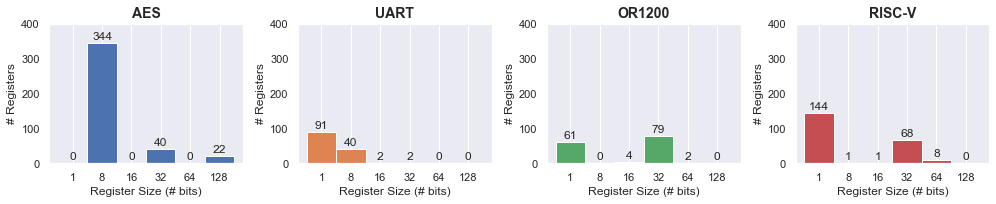

In [4]:
def plt_histogram(data, ax, title, color_index):
    bins = [0,8,16,32,64,128,256] # your bins

    # Create Histogram
    hist, bin_edges = np.histogram(data,bins) # make the histogram
    
    # Make x-tick labels list
    xtick_labels    = ['{}'.format(bins[i]) for i,j in enumerate(hist)]
    xtick_labels[0] = 1
    
    # Plot Histogram
    ax.bar(\
        range(len(hist)),\
        hist,\
        width      = 1,\
        align      = 'center',\
        tick_label = xtick_labels, \
        color      = current_palette[color_index])

    # Format Histogram
    ax.set_title(title, fontweight='bold', fontsize=14)
    ax.set_xlabel('Register Size (# bits)', fontsize=12)
    ax.set_ylabel('# Registers', fontsize=12)
    ax.grid(axis='y', alpha=0.5)
    ax.set_ylim(0, 400)
    
    # Text on the top of each barplot
    for i in range(len(hist)):
        ax.text(x = i , y = hist[i] + 10, s = hist[i], size = 12, horizontalalignment='center')

# Load Data
aes_counter_sizes      = load_counter_sizes(aes_data_dir)
uart_counter_sizes     = load_counter_sizes(uart_data_dir)
or1200_counter_sizes   = load_counter_sizes(or1200_data_dir)
picorv32_counter_sizes = load_counter_sizes(picorv32_data_dir)

# Create Figure
sns.set()
current_palette = sns.color_palette()
fig, axes = plt.subplots(1, 4, figsize=(14, 3))
plt_histogram(aes_counter_sizes['Coalesced Sizes'], axes[0], 'AES', 0)
plt_histogram(uart_counter_sizes['Coalesced Sizes'], axes[1], 'UART', 1)
plt_histogram(or1200_counter_sizes['Coalesced Sizes'], axes[2], 'OR1200', 2)
plt_histogram(picorv32_counter_sizes['Coalesced Sizes'], axes[3], 'RISC-V', 3)

# Show
plt.tight_layout(h_pad=1)
plt.show()

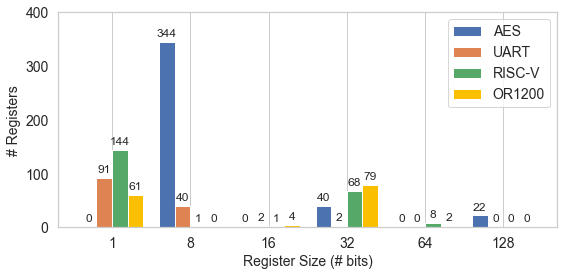

In [5]:
def plt_histogram_grouped(data_1, data_2, data_3, data_4, ax):
    bins = [0,8,16,32,64,128,256] # your bins

    # Create Histograms
    hist_1, bin_edges_1 = np.histogram(data_1, bins) # make the histogram
    hist_2, bin_edges_2 = np.histogram(data_2, bins) # make the histogram
    hist_3, bin_edges_3 = np.histogram(data_3, bins) # make the histogram
    hist_4, bin_edges_4 = np.histogram(data_4, bins) # make the histogram
    
    # Make x-tick labels list
    xtick_labels    = ['{}'.format(bins[i]) for i,j in enumerate(hist_1)]
    xtick_labels[0] = 1
    
    # Set bar widths
    bar_width = 0.2
    r_1 = range(len(hist_1))
    r_2 = [x + bar_width for x in r_1]
    r_2end = [x + bar_width + 0.1 for x in r_1]
    r_3 = [x + bar_width for x in r_2]
    r_4 = [x + bar_width for x in r_3]
    
    # Plot Histogram
    ax.bar(r_1, hist_1, color=current_palette[0], width=bar_width, edgecolor='white', label='AES')
    ax.bar(r_2, hist_2, color=current_palette[1], width=bar_width, edgecolor='white', label='UART')
    ax.bar(r_3, hist_3, color=current_palette[2], width=bar_width, edgecolor='white', label='RISC-V')
    ax.bar(r_4, hist_4, color='#FAC000', width=bar_width, edgecolor='white', label='OR1200')

    # Format Histogram
    plt.xticks(r_2end, xtick_labels, fontsize=14)
    plt.yticks(range(0, 401, 100), range(0, 401, 100), fontsize=14)
    plt.legend(fontsize=14)
    ax.set_xlabel('Register Size (# bits)', fontsize=14)
    ax.set_ylabel('# Registers', fontsize=14)
    ax.grid(axis='y', alpha=0.5)
    ax.set_ylim(0, 400)

    # Text on the top of each barplot
    for i in range(len(hist_1)):
        ax.text(x = i            ,     y = hist_1[i] + 10, s = hist_1[i], size = 12, horizontalalignment='center')
        ax.text(x = i + bar_width,     y = hist_2[i] + 10, s = hist_2[i], size = 12, horizontalalignment='center')
        ax.text(x = i + (2*bar_width), y = hist_3[i] + 10, s = hist_3[i], size = 12, horizontalalignment='center')
        ax.text(x = i + (3*bar_width), y = hist_4[i] + 10, s = hist_4[i], size = 12, horizontalalignment='center')

# Load Data
aes_counter_sizes      = load_counter_sizes(aes_data_dir)
uart_counter_sizes     = load_counter_sizes(uart_data_dir)
picorv32_counter_sizes = load_counter_sizes(picorv32_data_dir)
or1200_counter_sizes   = load_counter_sizes(or1200_data_dir)

# Create Figure
sns.set_style(style="whitegrid")
current_palette = sns.color_palette()
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
plt_histogram_grouped(\
    aes_counter_sizes['Coalesced Sizes'],\
    uart_counter_sizes['Coalesced Sizes'],\
    picorv32_counter_sizes['Coalesced Sizes'],\
    or1200_counter_sizes['Coalesced Sizes'],\
    axes)

# Save Histogram to PDF
plt.tight_layout(h_pad=1)
if HIST_SAVE_AS_PDF:
    plt.savefig(HIST_PDF_FILENAME, format='pdf')
plt.show()